<a href="https://colab.research.google.com/github/Eric1891/Micro-Credential-winter-2022/blob/main/Day_7_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prop =pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/property.csv')

In [ ]:
prop

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
new_prop = prop.set_index('PID')

In [ ]:
new_prop.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,NaN,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600


In [ ]:
new_prop['NUM_BEDROOMS'].str.isnumeric()

PID
100001000.0     True
100002000.0     True
100003000.0      NaN
100004000.0     True
NaN             True
100006000.0      NaN
100007000.0     True
100008000.0     True
100009000.0    False
Name: NUM_BEDROOMS, dtype: object

In [ ]:
new_prop['NUM_BEDROOMS'] = new_prop['NUM_BEDROOMS'].fillna(0)

In [ ]:
new_prop

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
PID,,,,,,
100001000.0,104.0,PUTNAM,Y,3,1,1000
100002000.0,197.0,LEXINGTON,N,3,1.5,--
100003000.0,NaN,LEXINGTON,N,0,1,850
100004000.0,201.0,BERKELEY,12,1,NaN,700
NaN,203.0,BERKELEY,Y,3,2,1600
100006000.0,207.0,BERKELEY,Y,0,1,800
100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
100008000.0,213.0,TREMONT,Y,1,1,NaN
100009000.0,215.0,TREMONT,Y,na,2,1800


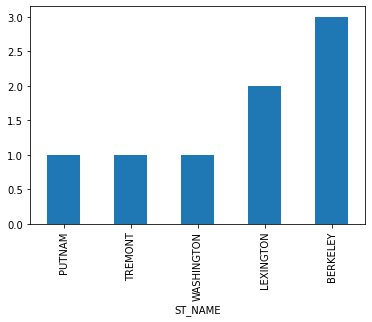

In [ ]:
new_prop.groupby(['ST_NAME'])['SQ_FT'].count().sort_values(ascending = True).plot(kind='bar')